In [ ]:
# the rest of the imports require the location to be the base of the repo 
#   i.e., SARS-CoV-2-network-analysis)
# run this first if needed to get to the right directory
import os
os.chdir('../../')
# os.chdir('/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis')
os.getcwd()

In [2]:
from collections import defaultdict
import argparse
import os, sys
from tqdm import tqdm
import itertools
#import utils.file_utils as utils
# also compute the significance of sinksource vs local
#from scipy.stats import kruskal, mannwhitneyu
# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
print("python version: %s" % (sys.version.split('\n')[0]))
print("matplotlib version: %s" % matplotlib.__version__)
print("seaborn version: %s" % sns.__version__)
print("pandas version: %s" % pd.__version__)
print("numpy version: %s" % (np.__version__))
# make this the default for now
sns.set_style('darkgrid')
# my local imports
# fss_dir = os.path.dirname(os.path.dirname(os.path.dirname(__file__)))
# sys.path.insert(0,fss_dir)
from src.FastSinkSource.src.plot import plot_utils
from src.FastSinkSource.src.algorithms import runner
from src.FastSinkSource.src.evaluate import cross_validation as cv

python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
matplotlib version: 3.1.3
seaborn version: 0.9.0
pandas version: 0.23.0
numpy version: 1.17.2


In [47]:
# also update the font size of the x and y ticks
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

# now make a point plot
def pointplot(df_all, ax=None, out_file=None, title="", order=None):
    if ax is None:
        f, ax = plt.subplots(figsize=(20,6))
    if order is None:
        net_fmax_vals = df_all[df_all['Algorithm'] == 'GM+'].groupby('plot_exp_name').median()['fmax']
        order = net_fmax_vals.sort_values(ascending=False).index
    ax = sns.pointplot(
        x='plot_exp_name', y='fmax', data=df_all, 
        hue='Algorithm', dodge=True, ax=ax,
        order=order,
    )
    
    ax.set_ylim(0.3,0.8)
    ax.set_ylabel('Fmax', weight='bold', fontsize=16)
    ax.set_xlabel('')
    ax.set_title(title, weight='bold', fontsize=18)
    
    plt.setp(ax.lines,linewidth=1)  # set lw for all lines of g axes
    ax.tick_params(axis='x', rotation=90)  # rotate the x-axis labels
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    if out_file is not None:
        print(out_file)
        plt.savefig(out_file, bbox_inches='tight')
        plt.show()
        plt.close()
    return order

In [8]:
def set_title(**kwargs):
    title = kwargs.get('title', '')
    title += " %s%s%s" % (
        " neg-factor=%s;"%kwargs['sample_neg_examples_factor'] if kwargs.get('sample_neg_examples_factor') else '',
        " seed=%s;"%kwargs['cv_seed'] if kwargs.get('cv_seed') else "",
        " # reps=%s;"%kwargs['num_reps'] if kwargs.get('num_reps',1) > 1 else "",
    )
    return title

In [3]:
net_versions = [
    "tissuenet-v2/hpa-protein",
    "tissuenet-v2/gtex-rnaseq",
    "tissuenet-v2/hpa-rnaseq",
]

algs = ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']
my_palette = plot_utils.my_palette
# postfix = config_map['eval_settings'].get('postfix','')
# print("postfix: '%s'" % (postfix))
# print(config_map)

inputs/config_files/tissuenet-v2/hpa-protein-cv5-nf1-nr100-seed1.yaml
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 1, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/localplus/cv-5folds-rep1-100-nf1-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/genemania/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/genemaniaplus/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes

/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis/FastSinkSource/src/plot/plot_utils.py:845: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_all = pd.concat([df_all, df])


Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/genemania/cv-5folds-rep1-100-nf1-seed1-gmw-a1_0-tol1e-05.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/genemaniaplus/cv-5folds-rep1-100-nf1-seed1-gmw-a1_0-tol1e-05.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/fastsinksource/cv-5folds-rep1-100-nf1-seed1-gmw-l0-a0_99-eps0-maxi10.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/fastsinksourceplus/cv-5folds-rep1-100-nf1-seed1-gmw-l0-a0_99-eps0-maxi10.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/sinksource/cv-5folds-rep1-100-nf1-seed1-gmw-l0-a1_0-eps1e-4-maxi1000.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/logistic_regression/cv-5folds-rep1-100-nf1-seed1-gmw-logistic_regression-maxi100.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/svm/cv-5folds-rep1-100-nf1-seed1-gmw-svm-maxi1000.txt
reading 

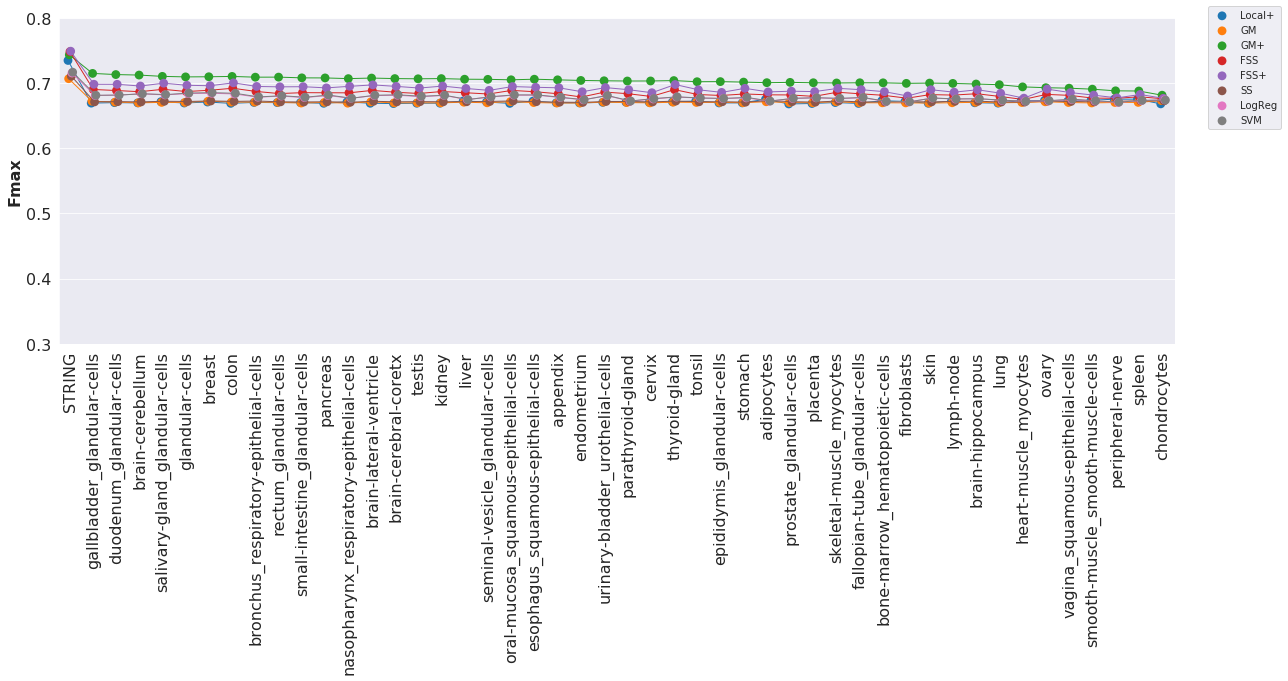

inputs/config_files/tissuenet-v2/hpa-protein-cv5-nf5-nr100-seed1.yaml
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 5, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/localplus/cv-5folds-rep1-100-nf5-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/genemania/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/genemaniaplus/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes

/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis/FastSinkSource/src/plot/plot_utils.py:845: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_all = pd.concat([df_all, df])


Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/genemania/cv-5folds-rep1-100-nf5-seed1-gmw-a1_0-tol1e-05.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/genemaniaplus/cv-5folds-rep1-100-nf5-seed1-gmw-a1_0-tol1e-05.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/fastsinksource/cv-5folds-rep1-100-nf5-seed1-gmw-l0-a0_99-eps0-maxi10.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/fastsinksourceplus/cv-5folds-rep1-100-nf5-seed1-gmw-l0-a0_99-eps0-maxi10.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/sinksource/cv-5folds-rep1-100-nf5-seed1-gmw-l0-a1_0-eps1e-4-maxi1000.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/logistic_regression/cv-5folds-rep1-100-nf5-seed1-gmw-logistic_regression-maxi100.txt
Writing outputs//networks/stringv11-indv/400/2020-03-sarscov2-human-ppi/svm/cv-5folds-rep1-100-nf5-seed1-gmw-svm-maxi1000.txt
reading 

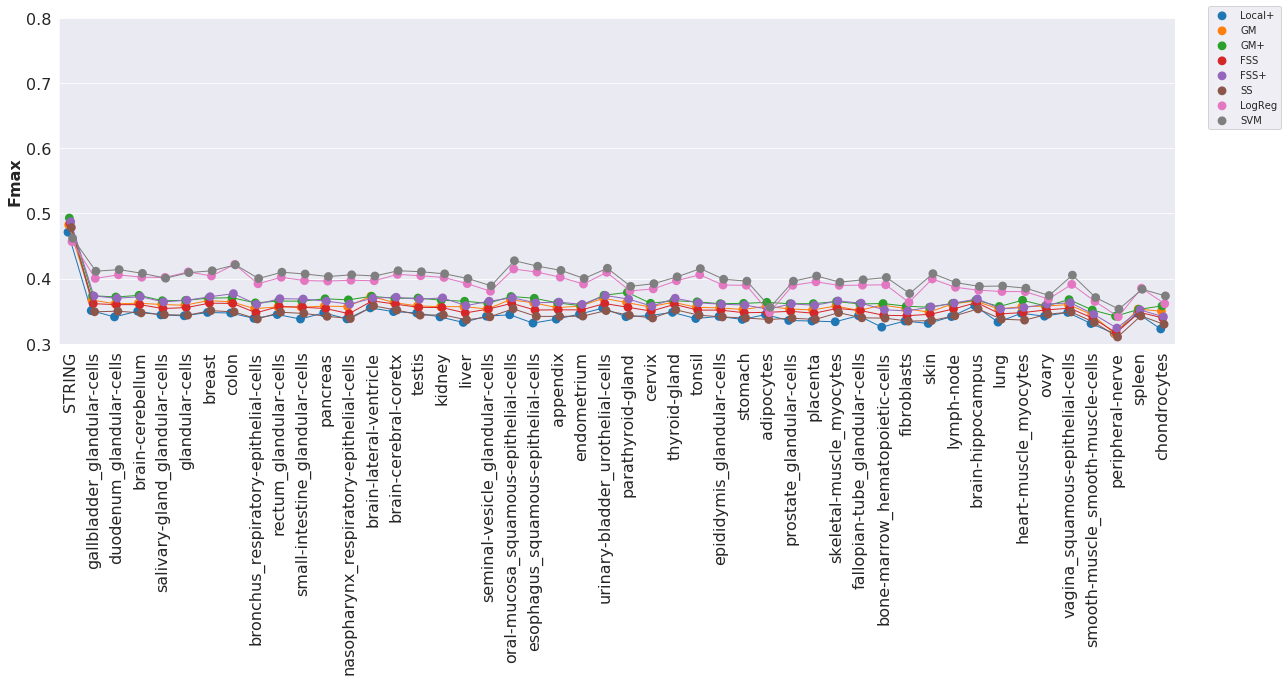

inputs/config_files/tissuenet-v2/gtex-rnaseq-cv5-nf1-nr100-seed1.yaml
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 1, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Adipose-Subcutaneous/localplus/cv-5folds-rep1-100-nf1-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Adipose-Subcutaneous/genemania/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Adipose-Subcutaneous/genemaniaplus/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03

/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis/FastSinkSource/src/plot/plot_utils.py:845: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_all = pd.concat([df_all, df])


reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/genemaniaplus/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/fastsinksource/cv-5folds-rep1-100-nf1-seed1-l0-a0_99-eps0-maxi10.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/fastsinksourceplus/cv-5folds-rep1-100-nf1-seed1-l0-a0_99-eps0-maxi10.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/sinksource/cv-5folds-rep1-100-nf1-seed1-l0-a1_0-eps1e-4-maxi1000.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/logistic_regression/cv-5folds-rep1-100-nf1-seed1-logistic_regression-maxi100.txt
reading processed

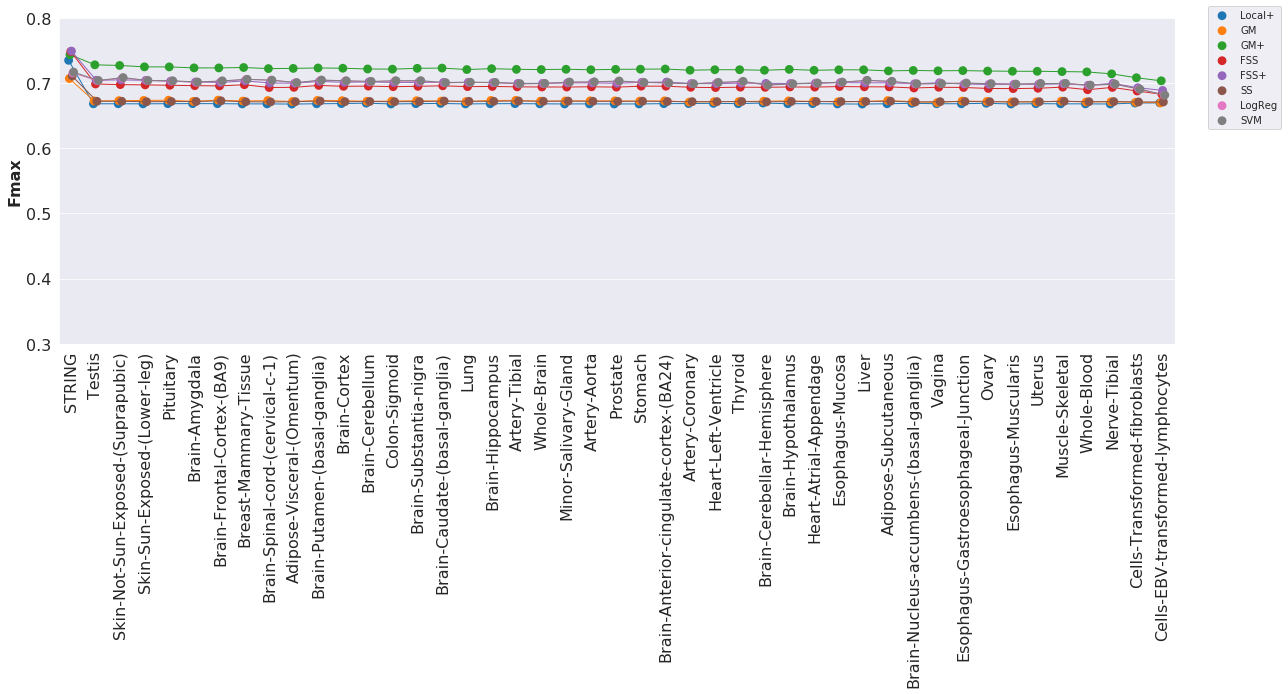

inputs/config_files/tissuenet-v2/gtex-rnaseq-cv5-nf5-nr100-seed1.yaml
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 5, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Adipose-Subcutaneous/localplus/cv-5folds-rep1-100-nf5-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Adipose-Subcutaneous/genemania/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Adipose-Subcutaneous/genemaniaplus/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03

/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis/FastSinkSource/src/plot/plot_utils.py:845: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_all = pd.concat([df_all, df])


reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/genemaniaplus/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/fastsinksource/cv-5folds-rep1-100-nf5-seed1-l0-a0_99-eps0-maxi10.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/fastsinksourceplus/cv-5folds-rep1-100-nf5-seed1-l0-a0_99-eps0-maxi10.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/sinksource/cv-5folds-rep1-100-nf5-seed1-l0-a1_0-eps1e-4-maxi1000.txt
reading processed repetition files from outputs//networks/tissuenet-v2/gtex-rnaseq/2020-03-sarscov2-human-ppi-Artery-Coronary/logistic_regression/cv-5folds-rep1-100-nf5-seed1-logistic_regression-maxi100.txt
reading processed

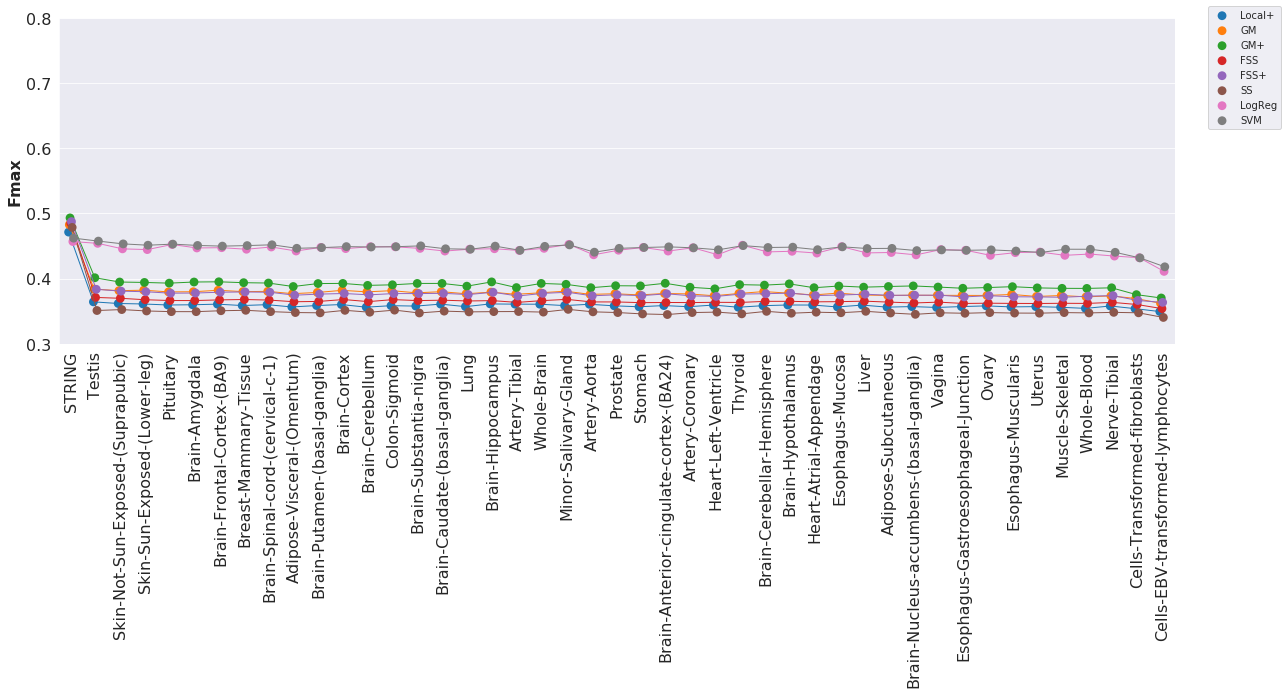

inputs/config_files/tissuenet-v2/hpa-rnaseq-cv5-nf1-nr100-seed1.yaml
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 1, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/localplus/cv-5folds-rep1-100-nf1-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/genemania/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/genemaniaplus/cv-5folds-rep1-100-nf1-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/fastsinksource/c

/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis/FastSinkSource/src/plot/plot_utils.py:845: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_all = pd.concat([df_all, df])


reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-brain/fastsinksourceplus/cv-5folds-rep1-100-nf1-seed1-l0-a0_99-eps0-maxi10.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-brain/sinksource/cv-5folds-rep1-100-nf1-seed1-l0-a1_0-eps1e-4-maxi1000.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-brain/logistic_regression/cv-5folds-rep1-100-nf1-seed1-logistic_regression-maxi100.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-brain/svm/cv-5folds-rep1-100-nf1-seed1-svm-maxi1000.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-colon/localplus/cv-5folds-rep1-100-nf1-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-p

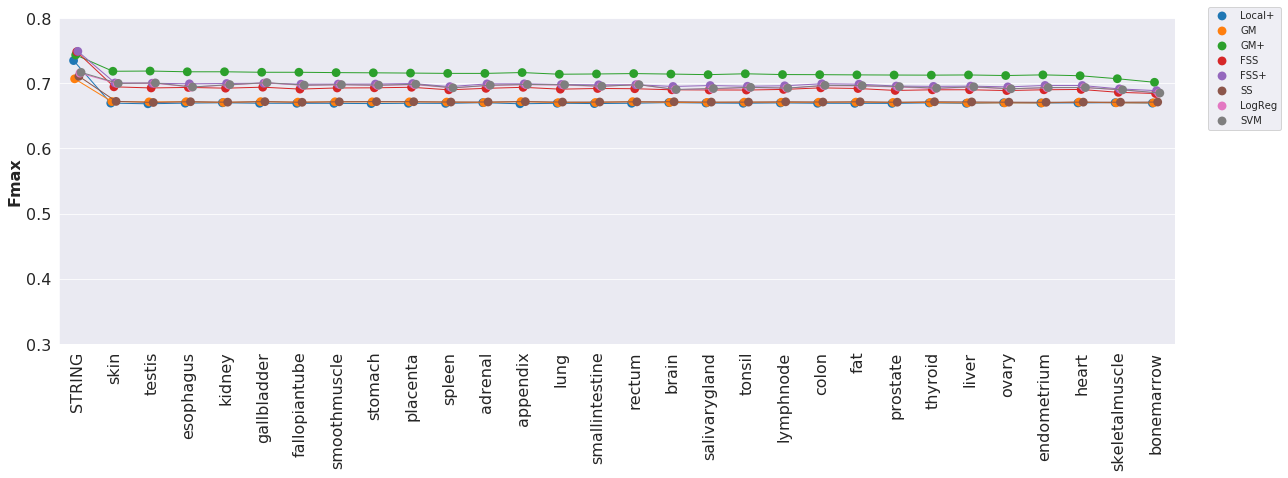

inputs/config_files/tissuenet-v2/hpa-rnaseq-cv5-nf5-nr100-seed1.yaml
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 5, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/localplus/cv-5folds-rep1-100-nf5-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/genemania/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/genemaniaplus/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-adrenal/fastsinksource/c

/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis/FastSinkSource/src/plot/plot_utils.py:845: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_all = pd.concat([df_all, df])


reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-brain/logistic_regression/cv-5folds-rep1-100-nf5-seed1-logistic_regression-maxi100.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-brain/svm/cv-5folds-rep1-100-nf5-seed1-svm-maxi1000.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-colon/localplus/cv-5folds-rep1-100-nf5-seed1-l0.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-colon/genemania/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-colon/genemaniaplus/cv-5folds-rep1-100-nf5-seed1-a1_0-tol1e-05.txt
reading processed repetition files from outputs//networks/tissuenet-v2/hpa-rnaseq/2020-03-sarscov2-human-ppi-colon/fastsinksource/

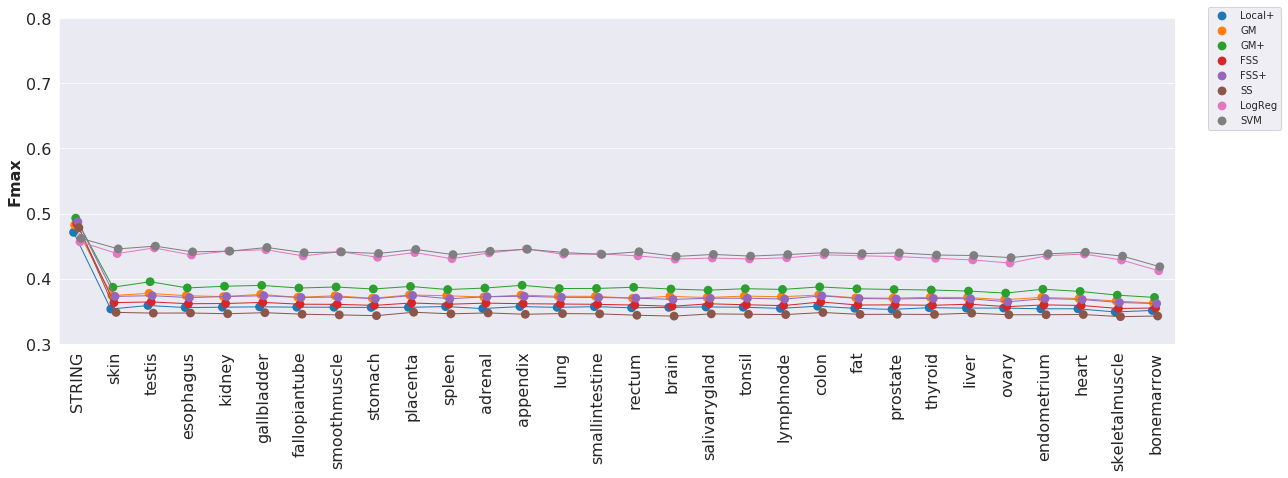

In [55]:
netv_results = []
for net_version in net_versions:
    all_dfs_and_kwargs = []
    config_files = []
    for negative_factor in [1, 5]:
        config_files.append("inputs/config_files/%s-cv5-nf%s-nr100-seed1.yaml" % (net_version, negative_factor))
#         config_files.append("inputs/config_files/%s-cv5-nf%s-nr100-seed1.yaml" % (net_version, negative_factor))
#         config_files.append("inputs/config_files/%s-cv5-nf%s-nr100-seed1.yaml" % (net_version, negative_factor))
    # keep the order of networks the same when changing negative factors
    order = None
    for config_file in config_files:
        print(config_file)
        config_map = plot_utils.load_config_file(config_file)
        kwargs = {}
        input_settings, alg_settings, output_settings, out_pref, kwargs = plot_utils.setup_variables(
                config_map, '', **kwargs)
        # set additional options here
        kwargs['algs'] = algs
        kwargs['num_reps'] = 100  # load all 100 repetitions of negative sampling and CV
        print(kwargs)

        # load the fmax values
        df_all = plot_utils.load_all_results(input_settings, alg_settings, output_settings, **kwargs)
        plot_utils.results_overview(df_all)
        eval_str = cv.get_output_prefix(
            kwargs['cross_validation_folds'], kwargs['num_reps'], 
            kwargs['sample_neg_examples_factor'], kwargs['cv_seed'])
        out_file = "%s%s-fmax-line.pdf" % (out_pref, eval_str)
        title = set_title(**kwargs)
        print(out_file)
        print(title)
        order = pointplot(df_all, out_file=out_file, order=order)
#         break
#     break
#         all_dfs_and_kwargs.append((df_all, kwargs))
#     netv_results.append(all_dfs_and_kwargs)

In [38]:
# net_fmax_vals = df_all[df_all['Algorithm'] == 'GM+'].groupby('plot_exp_name').median()['fmax']
# order = net_fmax_vals.sort_values(ascending=False).index
# df_all.sort_values(by=order).head()
# make the x-labels shorter by removing -cells
#df_all['plot_exp_name'] = df_all['plot_exp_name'].apply(lambda x: x.replace('-cells', ''))

outputs//viz/networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/cv-5folds-rep100-nf1-seed1-fmax-line.pdf
  neg-factor=1; seed=1; # reps=100;
outputs//viz/networks/tissuenet-v2/hpa-protein/2020-03-sarscov2-human-ppi-adipocytes/cv-5folds-rep100-nf1-seed1-fmax-line.pdf


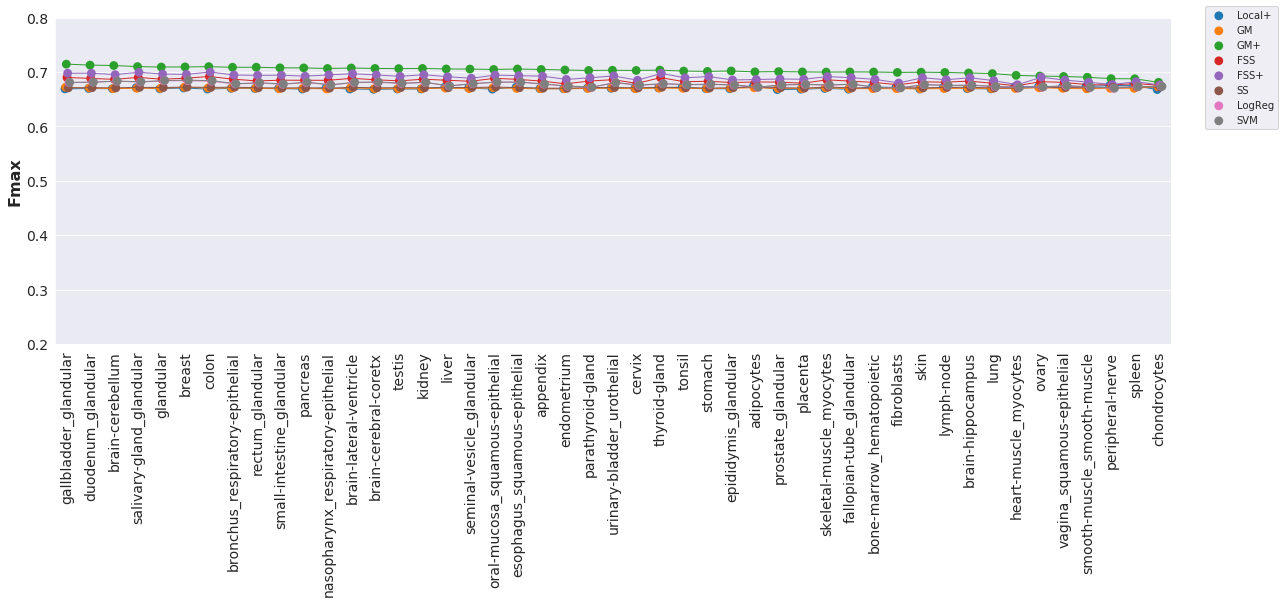

Index(['gallbladder_glandular', 'duodenum_glandular', 'brain-cerebellum',
       'salivary-gland_glandular', 'glandular', 'breast', 'colon',
       'bronchus_respiratory-epithelial', 'rectum_glandular',
       'small-intestine_glandular', 'pancreas',
       'nasopharynx_respiratory-epithelial', 'brain-lateral-ventricle',
       'brain-cerebral-coretx', 'testis', 'kidney', 'liver',
       'seminal-vesicle_glandular', 'oral-mucosa_squamous-epithelial',
       'esophagus_squamous-epithelial', 'appendix', 'endometrium',
       'parathyroid-gland', 'urinary-bladder_urothelial', 'cervix',
       'thyroid-gland', 'tonsil', 'stomach', 'epididymis_glandular',
       'adipocytes', 'prostate_glandular', 'placenta',
       'skeletal-muscle_myocytes', 'fallopian-tube_glandular',
       'bone-marrow_hematopoietic', 'fibroblasts', 'skin', 'lymph-node',
       'brain-hippocampus', 'lung', 'heart-muscle_myocytes', 'ovary',
       'vagina_squamous-epithelial', 'smooth-muscle_smooth-muscle',
       'peri

In [45]:
eval_str = cv.get_output_prefix(
    kwargs['cross_validation_folds'], kwargs['num_reps'], 
    kwargs['sample_neg_examples_factor'], kwargs['cv_seed'])
out_file = "%s%s-fmax-line.pdf" % (out_pref, eval_str)
title = set_title(**kwargs)
print(out_file)
print(title)
pointplot(df_all, out_file=out_file)#, title=title)

In [9]:
# for all_dfs_and_kwargs in netv_results:
#     for all_dfs, kwargs in all_dfs_and_kwargs:
#         print(kwargs)

{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 1, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 1, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 1, 'postfix': '', 'algs': ['localplus', 'genemania', 'genemaniaplus', 'fastsinksource', 'fastsinksourceplus', 'sinksource', 'logistic_regression', 'svm']}
{'cross_validation_folds': 5, 'cv_seed': 1, 'forcenet': True, 'num_reps': 100, 'only_eval': True, 'sample_neg_examples_factor': 5, 'postfix': '', 'algs